<a href="https://colab.research.google.com/github/2303A52247/SML/blob/main/SML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

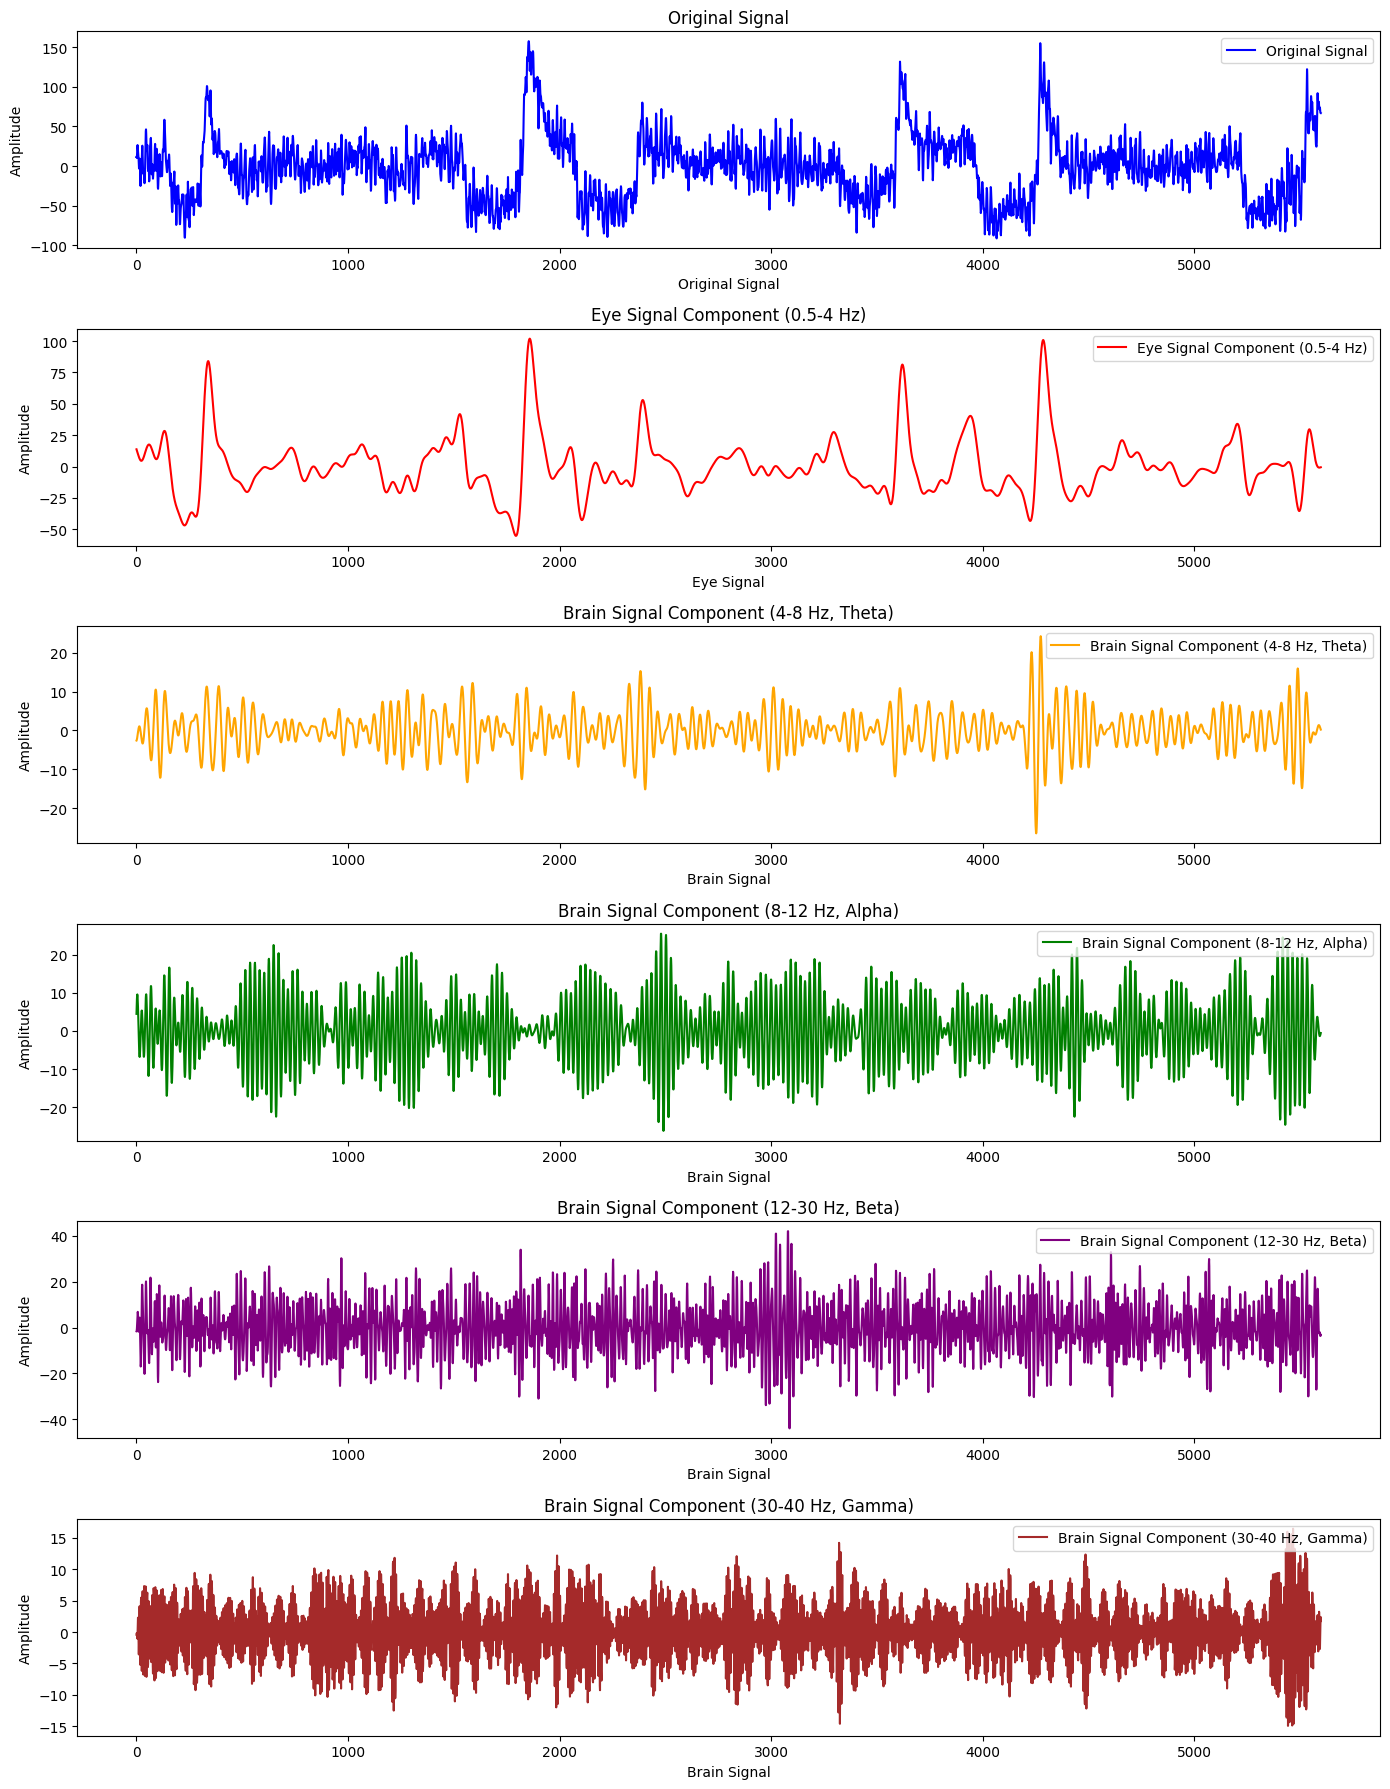

In [1]:
#SSA(Singular Spectrum Analysis)
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/sml project dataset.xlsx'
data = pd.read_excel(file_path)

# Bandpass Filter Function
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Sampling frequency
fs = 256

# Apply filters for multiple signal components
low_freq_eye_signal = bandpass_filter(data['Unnamed: 0'], 0.5, 4, fs)  # Eye Signal Component (0.5-4 Hz)
theta_signal = bandpass_filter(data['Unnamed: 0'], 4, 8, fs)           # Brain Signal Component (4-8 Hz)
alpha_signal = bandpass_filter(data['Unnamed: 0'], 8, 12, fs)          # Brain Signal Component (8-12 Hz)
beta_signal = bandpass_filter(data['Unnamed: 0'], 12, 30, fs)          # Brain Signal Component (12-30 Hz)
gamma_signal = bandpass_filter(data['Unnamed: 0'], 30, 40, fs)         # Brain Signal Component (30-40 Hz)

# Plot Original Signal and Filtered Components
plt.figure(figsize=(14, 18))

# Original Signal
plt.subplot(6, 1, 1)
plt.plot(data['Unnamed: 0'], color='blue', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Original Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Eye Signal Component
plt.subplot(6, 1, 2)
plt.plot(low_freq_eye_signal, color='red', label='Eye Signal Component (0.5-4 Hz)')
plt.title('Eye Signal Component (0.5-4 Hz)')
plt.xlabel('Eye Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Theta (Brain Signal Component)
plt.subplot(6, 1, 3)
plt.plot(theta_signal, color='orange', label='Brain Signal Component (4-8 Hz, Theta)')
plt.title('Brain Signal Component (4-8 Hz, Theta)')
plt.xlabel('Brain Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Alpha (Brain Signal Component)
plt.subplot(6, 1, 4)
plt.plot(alpha_signal, color='green', label='Brain Signal Component (8-12 Hz, Alpha)')
plt.title('Brain Signal Component (8-12 Hz, Alpha)')
plt.xlabel('Brain Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Beta (Brain Signal Component)
plt.subplot(6, 1, 5)
plt.plot(beta_signal, color='purple', label='Brain Signal Component (12-30 Hz, Beta)')
plt.title('Brain Signal Component (12-30 Hz, Beta)')
plt.xlabel('Brain Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Gamma (Brain Signal Component)
plt.subplot(6, 1, 6)
plt.plot(gamma_signal, color='brown', label='Brain Signal Component (30-40 Hz, Gamma)')
plt.title('Brain Signal Component (30-40 Hz, Gamma)')
plt.xlabel('Brain Signal')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Kurtosis
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.stats import kurtosis

file_path = '/content/drive/MyDrive/sml project dataset.xlsx'
data = pd.read_excel(file_path)

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

fs = 256

low_freq_eye_signal = bandpass_filter(data['Unnamed: 0'], 0.5, 4, fs)

brain_signal = bandpass_filter(data['Unnamed: 0'], 4, 40, fs)

eye_signal_kurtosis = kurtosis(low_freq_eye_signal)
brain_signal_kurtosis = kurtosis(brain_signal)

print("Kurtosis of Eye Signal Component:", eye_signal_kurtosis)
print("Kurtosis of Brain Signal Component:", brain_signal_kurtosis)


Kurtosis of Eye Signal Component: 3.828674740978377
Kurtosis of Brain Signal Component: 0.15366804687722668


In [ ]:
# Random Forest
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, entropy
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

file_path = '/content/drive/MyDrive/sml project dataset.xlsx'
data = pd.read_excel(file_path)

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

fs = 256

low_freq_eye_signal = bandpass_filter(data['Unnamed: 0'], 0.5, 4, fs)
brain_signal = bandpass_filter(data['Unnamed: 0'], 4, 40, fs)

segment_length = 256
num_segments = len(data) // segment_length

features = []
for i in range(num_segments):
    eye_segment = low_freq_eye_signal[i * segment_length:(i + 1) * segment_length]
    brain_segment = brain_signal[i * segment_length:(i + 1) * segment_length]

    feature_row = {
        'eye_entropy': entropy(np.histogram(eye_segment, bins=50, density=True)[0]),
        'eye_kurtosis': kurtosis(eye_segment),
        'eye_mean': np.mean(eye_segment),
        'eye_std': np.std(eye_segment),
        'brain_entropy': entropy(np.histogram(brain_segment, bins=50, density=True)[0]),
        'brain_kurtosis': kurtosis(brain_segment),
        'brain_mean': np.mean(brain_segment),
        'brain_std': np.std(brain_segment)
    }
    features.append(feature_row)

features_df = pd.DataFrame(features)

labels = np.random.randint(2, size=num_segments)

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
#KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

file_path = '/content/drive/MyDrive/sml project dataset.xlsx'
df = pd.ExcelFile(file_path).parse('Sheet1')

df['label'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

X = df.iloc[:, 0].values.reshape(-1, 1)
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       794
           1       0.29      0.14      0.19       326

    accuracy                           0.65      1120
   macro avg       0.50      0.50      0.48      1120
weighted avg       0.59      0.65      0.61      1120



In [5]:
#SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

file_path = '/content/drive/MyDrive/sml project dataset.xlsx'
df = pd.ExcelFile(file_path).parse('Sheet1')

df['label'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

X = df.iloc[:, 0].values.reshape(-1, 1)
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       775
           1       0.00      0.00      0.00       345

    accuracy                           0.69      1120
   macro avg       0.35      0.50      0.41      1120
weighted avg       0.48      0.69      0.57      1120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
